## Logistic Regression as a Machine learning Model to Predict a Boolean Variable

In [1]:
# Importing the key libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset to leverage
dataset = pd.read_csv("./data/social_network_ads.csv")

In [5]:
# Reviewing the dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
# Creating the matrix of independent variables and the vector of the dependent variable
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [65]:
# Split the dataset into the test set and the training set
# Determine a 25% split into the test set and 75% split into the training set
dataset.shape

(400, 5)

In [66]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

In [67]:
# Feature Scaling to have both the age and the salary variables relate to each other
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

In [68]:
# Fitting Logistic Regression Model to the Training Set, in order to have the model learn of the correlations between the age and estimated salary variables
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\nancy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Predict the test set results
y_pred = classifier.predict(X_test)

In [70]:
# Make the confusion matrix to determine performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [39]:
# Visualize the Training Set results
# The goal is to classify the right users in the right categories
# Represent it by plotting, the prediction regions - the two regions displayed below
# The prediction boundary is a straight line because it's a linear model, or linear classifier

In [71]:
# Visualization code below
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

In [72]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


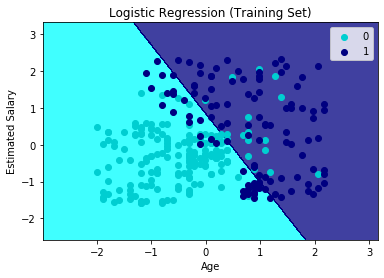

In [73]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
           alpha =0.75, cmap =ListedColormap(('aqua','navy')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set==j,1],
               c= ListedColormap(('darkturquoise','navy'))(i), label=j)

plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


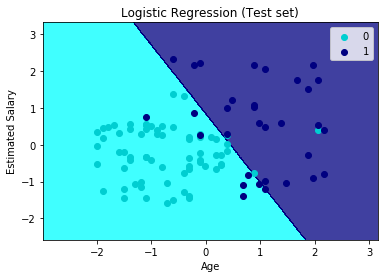

In [83]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkturquoise', 'navy'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [77]:
# Thanks to SuperDataScience, and sklearn documentation